<a href="https://colab.research.google.com/github/dantebarross/scientific-projects-with-python/blob/main/Analysing_wine_quality_Statistically.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project, let's explore, statistically, wine and it's qualities metrics.

Dataset from UCI:
- https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(url, sep=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
df.keys()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [9]:
for column in df.keys():
  print(f"Column {column} has {len(np.unique(df['pH']))} unique values.")

Column fixed acidity has 89 unique values.
Column volatile acidity has 89 unique values.
Column citric acid has 89 unique values.
Column residual sugar has 89 unique values.
Column chlorides has 89 unique values.
Column free sulfur dioxide has 89 unique values.
Column total sulfur dioxide has 89 unique values.
Column density has 89 unique values.
Column pH has 89 unique values.
Column sulphates has 89 unique values.
Column alcohol has 89 unique values.
Column quality has 89 unique values.


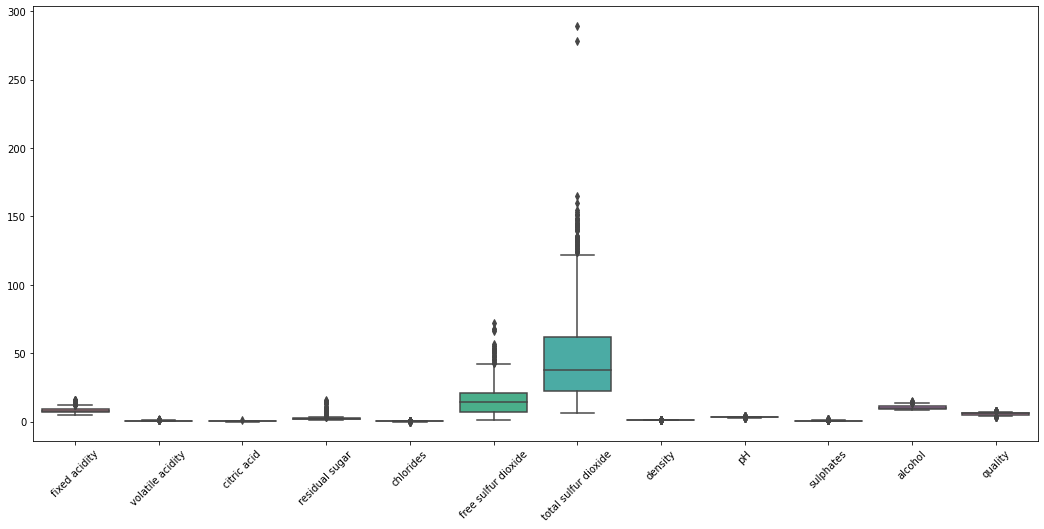

In [11]:
plt.figure(figsize=[18, 8])
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

We can see two possible outlier data points in 'total sulfur dioxide' column.

Let's disconsider this two data points based on the boxplot:

In [15]:
df = df[df['total sulfur dioxide'] < 200]

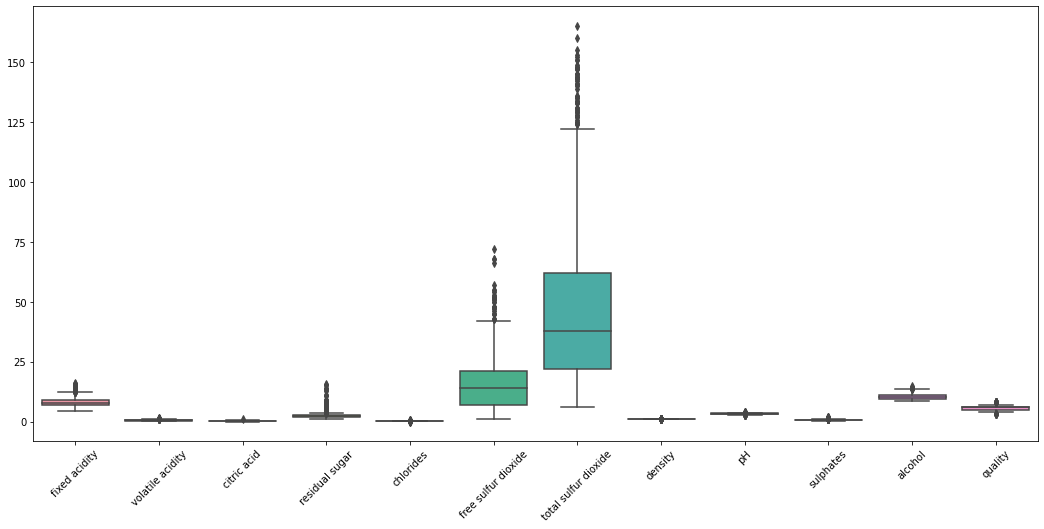

In [16]:
plt.figure(figsize=[18, 8])
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

Done!

# Visual data explorations

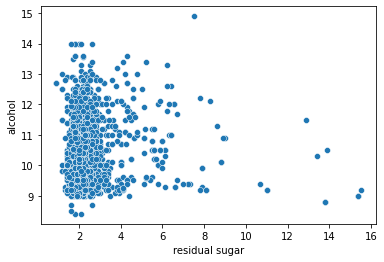

In [17]:
sns.scatterplot(x=df['residual sugar'], y=df['alcohol'])
plt.show()

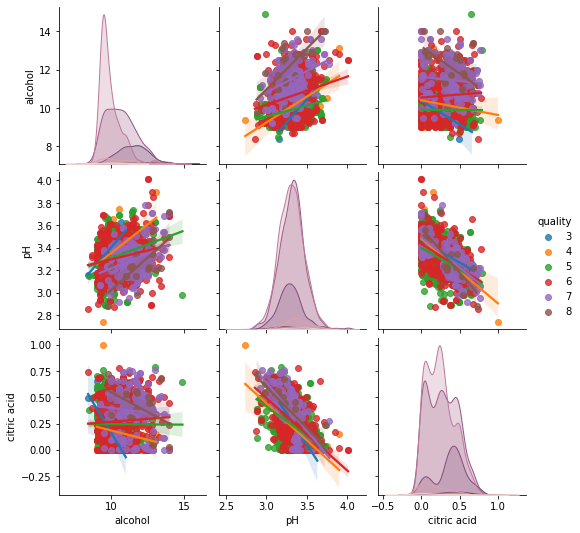

In [23]:
sns.pairplot(df[['alcohol', 'pH', 'citric acid', 'quality']], kind='reg', hue='quality')
plt.show()

# Statistical analysis

Let's use a t-test to investigate whether volatile acidity is different between wines rated as quality 3 (lowest) versus quality 8 (highest).

In [32]:
import scipy.stats as stats

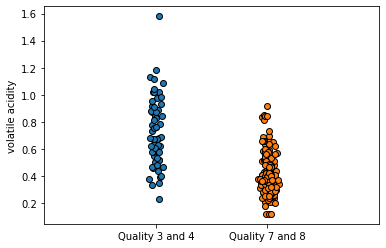

In [46]:
x = df['volatile acidity'][(df['quality'] == 3) | (df['quality'] == 4)]
y = df['volatile acidity'][(df['quality'] == 8) | (df['quality'] == 7)]

plt.plot(np.random.randn(len(x))/30, x, 'o',
         np.random.randn(len(y))/30+1, y, 'o',
         markeredgecolor='k')

plt.xlim([-1, 2])
plt.xticks([0, 1], labels=['Quality 3 and 4', 'Quality 7 and 8'])
plt.ylabel('volatile acidity')
plt.show()

In [45]:
# t-test
ttest = stats.ttest_ind(x, y)
print(ttest)

Ttest_indResult(statistic=12.765504354353604, pvalue=1.215425804161403e-29)


In [36]:
qualcounts = np.zeros(6)

n = 0
for i in range(3, 9): # 3 lowest, 8 highest
  qualcounts[n] = len(df[df['quality'] == i])
  n += 1

qualcounts

array([ 10.,  53., 681., 638., 197.,  18.])

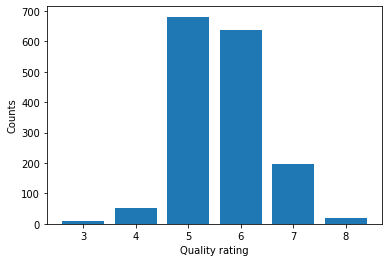

In [38]:
plt.bar(range(3, 9), qualcounts)
plt.xlabel('Quality rating')
plt.ylabel('Counts')
plt.show()

In [40]:
# or...

counts = df['quality'].value_counts()

plt.bar(list(counts.keys())

TypeError: ignored